# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay


In [ ]:
iris = datasets.load_iris()

In [ ]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


# Analisis Exploratorio

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


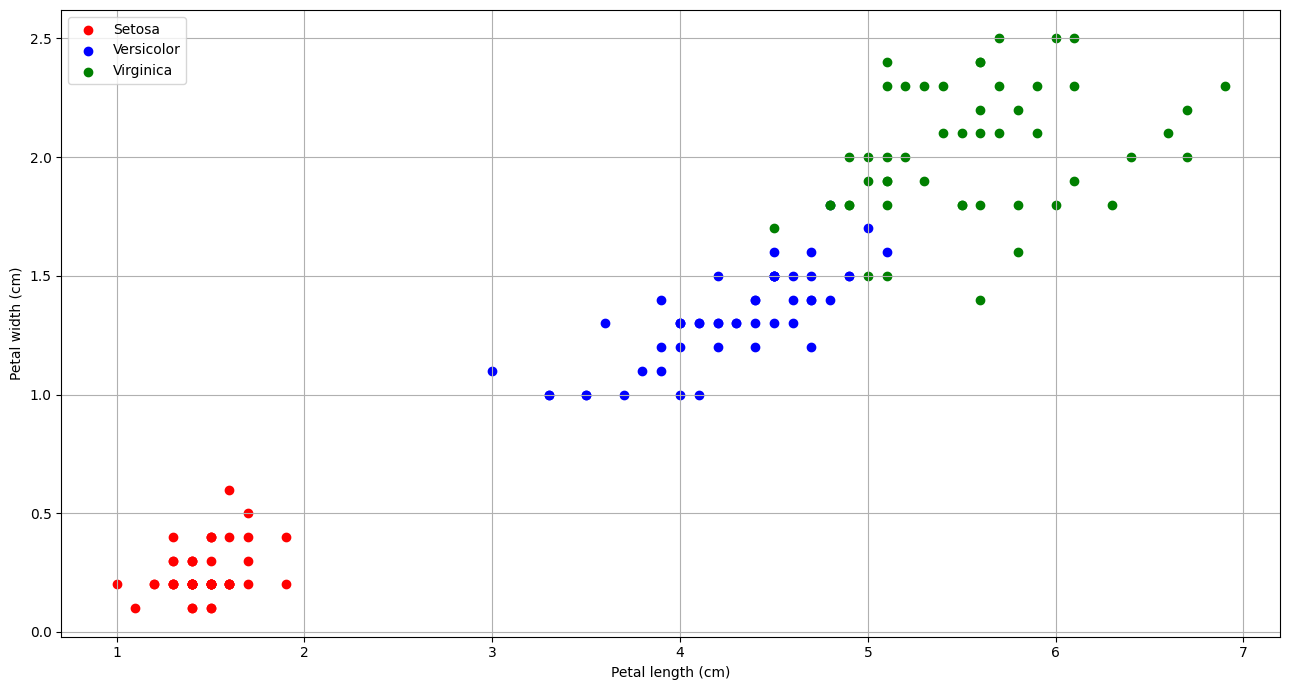

In [ ]:
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

fig, ax = plt.subplots(figsize = (13,7))

ax.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'], label = 'Setosa', facecolor = "red")
ax.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'], label = 'Versicolor', facecolor = "blue")
ax.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'], label = 'Virginica', facecolor = "green")

ax.grid()
ax.legend(loc = 'upper left')
ax.set_xlabel('Petal length (cm)')
ax.set_ylabel('Petal width (cm)')
plt.tight_layout()
plt.show()


En el grafico podemos observar los puntos agrupados por colores, donde rojo son datos correspondientes a Setosa, Azules a Versicolor y Verde a Virginica.

# Ajuste del modelo

In [ ]:
X = iris.drop(['sepal width (cm)', 'sepal length (cm)', 'target', 'species'], axis = 1)
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.9, random_state = 1)

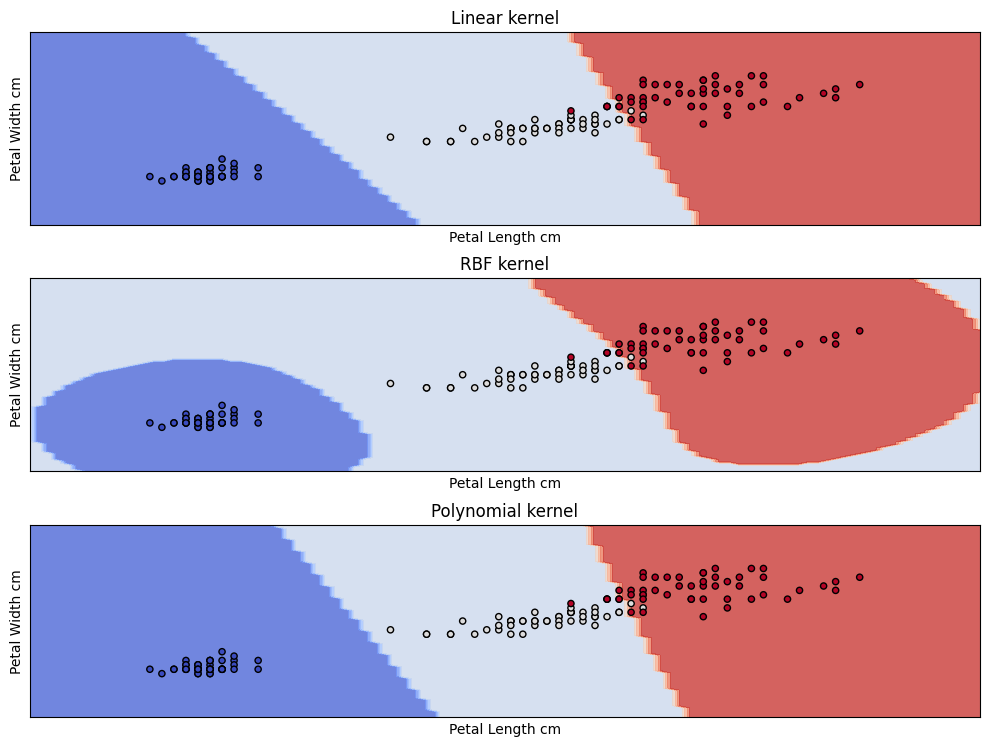

In [ ]:
C = 1

models = (
    SVC(kernel="linear", C=C),
    SVC(kernel="rbf", gamma=0.7, C=C),
    SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X_train, y_train) for clf in models)

titles = (
    "Linear kernel",
    "RBF kernel",
    "Polynomial kernel",
)

fig, sub = plt.subplots(3, 1, figsize = (10,8))

X0, X1 = X['petal length (cm)'], X['petal width (cm)']

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='Petal Length cm',
        ylabel='Petal Width cm',
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.show()